In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
malaria = pd.read_csv('dataset/malaria_prediction.csv')

In [3]:
malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,0,Male,yes,no,no,no,no,yes,no,no,no,no,yes,no,yes,yes,no,no
1,1,Male,no,no,yes,yes,yes,no,no,no,no,no,yes,no,no,no,no,no
2,0,Female,yes,no,no,yes,no,yes,no,yes,yes,no,no,yes,yes,no,no,no
3,1,Female,yes,yes,yes,no,yes,no,no,no,no,yes,yes,yes,yes,no,yes,no
4,1,Female,yes,yes,yes,no,yes,no,no,yes,yes,yes,yes,yes,no,no,no,no


In [4]:
malaria.shape

(1000, 18)

In [5]:
malaria.isna().sum()

age               0
sex               0
fever             0
cold              0
rigor             0
fatigue           0
headace           0
bitter_tongue     0
vomitting         0
diarrhea          0
Convulsion        0
Anemia            0
jundice           0
cocacola_urine    0
hypoglycemia      0
prostraction      0
hyperpyrexia      0
severe_maleria    0
dtype: int64

In [6]:
malaria.describe()

,age
count,1000.000000
mean,0.512000
std,0.500106
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
values = {"fever":{"no":0, "yes":1},"cold":{"no":0, "yes":1},"rigor":{"no":0, "yes":1},"fatigue":{"no":0, "yes":1},
          "headace":{"no":0, "yes":1},"bitter_tongue":{"no":0, "yes":1},"vomitting":{"no":0, "yes":1},
          "diarrhea":{"no":0, "yes":1},"Convulsion":{"no":0, "yes":1},"Anemia":{"no":0, "yes":1},"jundice":{"no":0, "yes":1},
          "cocacola_urine":{"no":0, "yes":1},"hypoglycemia":{"no":0, "yes":1},"prostraction":{"no":0, "yes":1},
          "hyperpyrexia":{"no":0, "yes":1},"hyperpyrexia":{"no":0, "yes":1},"severe_maleria":{"no":0, "yes":1},"sex":{"Male":1, "Female":0}}

malaria.replace(values,inplace=True)

In [8]:
malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0
1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
3,1,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,0
4,1,0,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0


In [9]:
y = malaria['severe_maleria']

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: severe_maleria, Length: 1000, dtype: int64

In [11]:
new_malaria = malaria.drop('severe_maleria', axis=1)

In [12]:
new_malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
3,1,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1
4,1,0,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0


In [13]:
new_malaria = new_malaria.drop('age', axis=1)

In [14]:
new_malaria.head()

,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
3,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1
4,0,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0


In [15]:
print(malaria.groupby('severe_maleria').size())

severe_maleria
0    677
1    323
dtype: int64


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='severe_maleria', ylabel='count'>

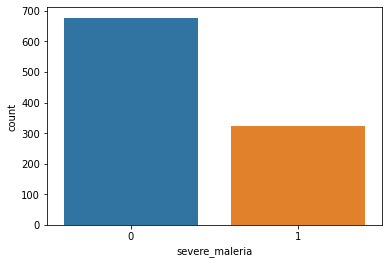

In [16]:
import seaborn as sns

sns.countplot(malaria['severe_maleria'],label="Count")

In [17]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_malaria, y, test_size=0.2, random_state=42)

In [19]:
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [20]:
import pickle
import os
scaler_path=os.path.join('models/scaler_malaria.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

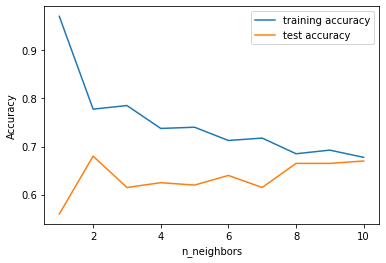

In [21]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.67


In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.677
Test set accuracy: 0.675


In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.677
Test set accuracy: 0.675


In [25]:
import joblib
model_path=os.path.join('models/gnb_malaria.sav')
joblib.dump(logreg,model_path)

['C:/Users/my pc/Desktop/Stroke-Risk-Prediction-imp/models/gnb_malaria.sav']

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=20).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.677
Test set accuracy: 0.675


In [27]:
y_pred = logreg.predict(X_test)

In [50]:
y_test

521    0
737    0
740    0
660    0
411    0
      ..
408    0
332    1
208    0
613    0
78     0
Name: severe_maleria, Length: 200, dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.969
Accuracy on test set: 0.525


In [29]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.726
Accuracy on test set: 0.630


In [30]:
# malaria_features = [x for i,x in enumerate(new_malaria.columns) if i!=17]
# def plot_feature_importances_malaria(model):
#     plt.figure(figsize=(8,6))
#     n_features = 17
#     plt.barh(range(n_features), model.feature_importances_, align='center',color="c")
#     plt.yticks(np.arange(n_features), malaria_features)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.ylim(-1, n_features)

# plot_feature_importances_malaria(tree)
# plt.savefig('feature_importance')

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.969
Accuracy on test set: 0.615


In [32]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.677
Accuracy on test set: 0.675


In [33]:
# plot_feature_importances_malaria(rf)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.715
Accuracy on test set: 0.660


In [35]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.677
Accuracy on test set: 0.675


In [36]:
# plot_feature_importances_malaria(gb1)

In [37]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.67


In [38]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [39]:
Y_pred_sgd=sgd.predict(X_test)
ac_sgd=accuracy_score(y_test,Y_pred_sgd)
ac_sgd

0.61

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [41]:
Y_pred_gnb=gnb.predict(X_test)
ac_gnb=accuracy_score(y_test,Y_pred_gnb)
ac_gnb

0.65

In [42]:
# import joblib
# model_path=os.path.join('C:/Users/my pc/Desktop/Stroke-Risk-Prediction-imp/','models/gnb_malaria.sav')
# joblib.dump(gnb,model_path)

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[20:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
Y_pred_xgb=xgb.predict(X_test)
ac_xgb=accuracy_score(y_test,Y_pred_xgb)
ac_xgb

c:\users\my pc\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.565

In [45]:
new_malaria


,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
3,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1
4,0,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0
996,1,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1
997,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0
998,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0


In [46]:
new_malaria.iloc[115]

sex               1
fever             1
cold              1
rigor             0
fatigue           0
headace           1
bitter_tongue     0
vomitting         0
diarrhea          0
Convulsion        0
Anemia            1
jundice           1
cocacola_urine    1
hypoglycemia      1
prostraction      0
hyperpyrexia      0
Name: 115, dtype: int64

In [47]:
for i in range(0,1000):
    print(i,'=',y[i],end=' ')

0 = 0 1 = 0 2 = 0 3 = 0 4 = 0 5 = 0 6 = 1 7 = 0 8 = 0 9 = 1 10 = 0 11 = 0 12 = 0 13 = 0 14 = 0 15 = 1 16 = 0 17 = 1 18 = 1 19 = 1 20 = 0 21 = 1 22 = 0 23 = 0 24 = 0 25 = 0 26 = 0 27 = 0 28 = 0 29 = 1 30 = 1 31 = 0 32 = 0 33 = 1 34 = 0 35 = 0 36 = 0 37 = 0 38 = 0 39 = 1 40 = 1 41 = 0 42 = 0 43 = 1 44 = 0 45 = 0 46 = 1 47 = 1 48 = 0 49 = 1 50 = 0 51 = 0 52 = 0 53 = 0 54 = 0 55 = 0 56 = 0 57 = 0 58 = 1 59 = 0 60 = 0 61 = 0 62 = 0 63 = 0 64 = 1 65 = 0 66 = 0 67 = 1 68 = 1 69 = 0 70 = 1 71 = 0 72 = 0 73 = 0 74 = 1 75 = 1 76 = 1 77 = 0 78 = 0 79 = 0 80 = 0 81 = 0 82 = 0 83 = 0 84 = 0 85 = 1 86 = 0 87 = 0 88 = 0 89 = 0 90 = 0 91 = 0 92 = 0 93 = 0 94 = 0 95 = 0 96 = 0 97 = 0 98 = 1 99 = 0 100 = 0 101 = 0 102 = 0 103 = 0 104 = 0 105 = 1 106 = 0 107 = 1 108 = 0 109 = 1 110 = 0 111 = 0 112 = 0 113 = 0 114 = 0 115 = 1 116 = 0 117 = 1 118 = 0 119 = 0 120 = 0 121 = 0 122 = 0 123 = 0 124 = 1 125 = 1 126 = 0 127 = 1 128 = 1 129 = 1 130 = 0 131 = 1 132 = 1 133 = 1 134 = 0 135 = 0 136 = 0 137 = 1 138 = 

In [48]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: severe_maleria, Length: 1000, dtype: int64